# K-Fold Cross Validation

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [3]:
print(f'{df.head()}')
print('---------------------------------------------------')
print(f'{df.describe()}')
print('---------------------------------------------------')
print(f'{df.info()}')
print('---------------------------------------------------')
print(f'{df.columns}')

    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0
---------------------------------------------------
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
---------------------------------------------------
<class 'pandas.core.fra

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

### Feature Scaling

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting Kernel SVM Classification to the Training set

In [7]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

### Predicting the Test set results

In [8]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

### Applying k-Fold Cross Validation

In [21]:
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)
[print(num*100) for num in accuracies]
print(f'Accuracy means: {accuracies.mean()*100}%')
print(f'Accuracy standard deviation: {accuracies.std()}')

80.64516129032258
96.66666666666667
80.0
93.33333333333333
86.66666666666667
83.33333333333334
93.33333333333333
93.33333333333333
96.66666666666667
96.55172413793103
Accuracy means: 90.05302187615868%
Accuracy standard deviation: 0.06388957356626285


### Making the Confusion Matrix

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [23]:
accuracy = (cm[0][0]+cm[1][1])/(cm.sum())
print(f'Accuracy = {accuracy*100}%')

Accuracy = 93.0%


### Visualising the Training set results

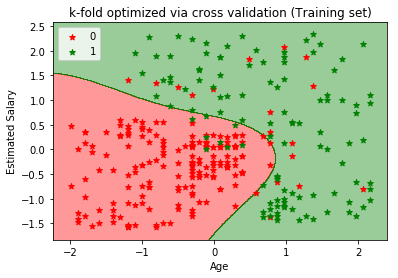

In [27]:
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - .25,
                               stop=X_set[:, 0].max() + .25, step=0.01),
                     np.arange(start=X_set[:, 1].min() - .25,
                               stop=X_set[:, 1].max() + .25, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array(
    [X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.4, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=['r', 'g'][i], marker='*', label=j)

plt.title('k-fold optimized via cross validation (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

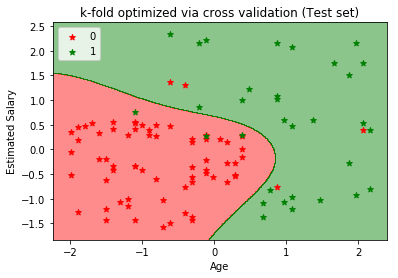

In [28]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - .25,
                               stop=X_set[:, 0].max() + .25, step=0.01),
                     np.arange(start=X_set[:, 1].min() - .25,
                               stop=X_set[:, 1].max() + .25, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array(
    [X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.45, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=['r', 'g'][i], marker='*', label=j)

plt.title('k-fold optimized via cross validation (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()